### Sales Analysis

In [17]:
import pandas as pd
import os

#### Merge 12 months into single file

In [18]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]
x = os.listdir('./Sales_Data')

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
    
print(all_months_data)
    
all_months_data.to_csv("all_data.csv", index=False)

      Order ID                 Product Quantity Ordered Price Each  \
0       295665      Macbook Pro Laptop                1       1700   
1       295666      LG Washing Machine                1      600.0   
2       295667    USB-C Charging Cable                1      11.95   
3       295668        27in FHD Monitor                1     149.99   
4       295669    USB-C Charging Cable                1      11.95   
...        ...                     ...              ...        ...   
13617   222905  AAA Batteries (4-pack)                1       2.99   
13618   222906        27in FHD Monitor                1     149.99   
13619   222907    USB-C Charging Cable                1      11.95   
13620   222908    USB-C Charging Cable                1      11.95   
13621   222909  AAA Batteries (4-pack)                1       2.99   

           Order Date                        Purchase Address  
0      12/30/19 00:01  136 Church St, New York City, NY 10001  
1      12/29/19 07:03     562 2

#### Read in updated dataframe

In [19]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Q1: Best month for sales

In [20]:
sales_month_sort = all_data["Order Date"]
sales_month_sort.head()

0    12/30/19 00:01
1    12/29/19 07:03
2    12/12/19 18:21
3    12/22/19 15:13
4    12/18/19 12:38
Name: Order Date, dtype: object

Finding best month:
1. find out totals for each month
2. sort by highest month

totals for each month

#### Augment Data with new columns


Task 2: Add Month Column

In [21]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06
186849,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301",06


#### Finding missing data

In [22]:
all_data_complete = all_data.dropna()

print(all_data_complete.isna().any())

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
Month               False
dtype: bool


Check individual values for missing values


In [23]:
print(all_data_complete.isna())

        Order ID  Product  Quantity Ordered  Price Each  Order Date  \
0          False    False             False       False       False   
1          False    False             False       False       False   
2          False    False             False       False       False   
3          False    False             False       False       False   
4          False    False             False       False       False   
...          ...      ...               ...         ...         ...   
186845     False    False             False       False       False   
186846     False    False             False       False       False   
186847     False    False             False       False       False   
186848     False    False             False       False       False   
186849     False    False             False       False       False   

        Purchase Address  Month  
0                  False  False  
1                  False  False  
2                  False  False  
3          

Check each column for missing values


In [24]:
print(all_data_complete.isna().any())

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
Month               False
dtype: bool


In [25]:
import matplotlib.pyplot as plt

<AxesSubplot:>

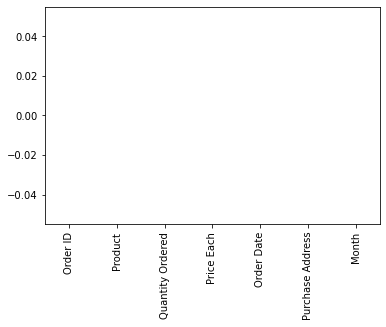

In [26]:
all_data_complete.isna().sum().plot(kind="bar")

In [27]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [28]:
all_data = all_data.dropna()

<AxesSubplot:>

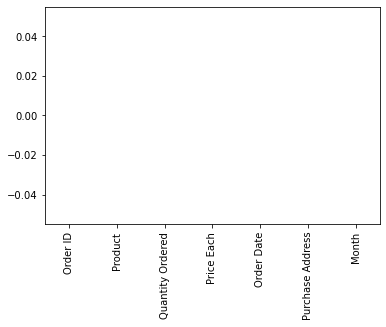

In [29]:
all_data.isna().sum().plot(kind="bar")

### Converting number strings into integers

In [30]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [31]:
#all_data[all_data["col"].str.contains("Quantity Ordered")==False]

Sales columns

In [32]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


##### Best month for sales and earning

1. subset for month and sales columns only
2. print the month with highest sales

In [33]:
#subset for month and sales columns only

month_sales = all_data[['Order ID','Month', 'Sales']]
month_sales.sort_values(by="Sales", ascending=False)

,Order ID,Month,Sales
29834,181069,04,3400.00
173613,210292,06,3400.00
89549,200528,05,3400.00
30336,181544,04,3400.00
137282,278637,10,1999.98
...,...,...,...
92238,203086,05,2.99
92230,203078,05,2.99
92222,203070,05,2.99
92194,203042,05,2.99


In [34]:
results = all_data.groupby("Month").sum()

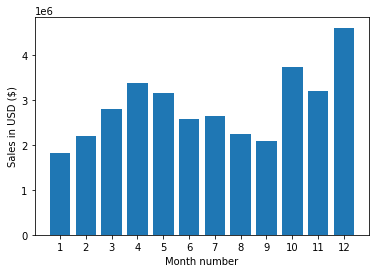

In [35]:
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Question 2: Which city has highest number of sales

AttributeError: 'DatetimeProperties' object has no attribute 'timeall_data'

In [40]:
#dropping surplus columns
all_data.drop(['address','code'], axis=1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06,2.99,Boston
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06,149.99,New York City
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06,11.95,San Francisco
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06,11.95,San Francisco


In [42]:
#summing up sales in eah city
city_sales = all_data.groupby("city").sum()
city_sales

,Quantity Ordered,Price Each,Sales
city,,,
Atlanta,16602,2779908.20,2795498.58
Austin,11153,1809873.61,1819581.75
Boston,22528,3637409.77,3661642.01
Dallas,16730,2752627.82,2767975.40
Los Angeles,33289,5421435.23,5452570.80
New York City,27932,4635370.83,4664317.43
Portland,14053,2307747.47,2320490.61
San Francisco,50239,8211461.74,8262203.91
Seattle,16553,2733296.01,2747755.48


In [53]:
city_sales.columns

Index(['Quantity Ordered', 'Price Each', 'Sales'], dtype='object')

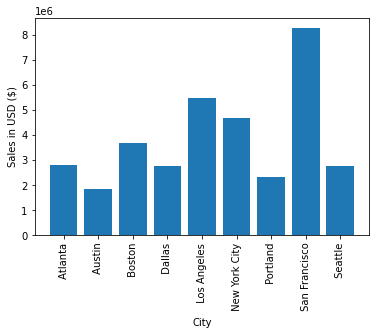

In [72]:
plt.bar(city_sales.index.values, city_sales['Sales'])
plt.xticks(rotation=90)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [137]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,address,city,code,Time,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,136 Church St,New York City,NY 10001,00:01:00,0,1,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,562 2nd St,New York City,NY 10001,07:03:00,7,3,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,277 Main St,New York City,NY 10001,18:21:00,18,21,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,410 6th St,San Francisco,CA 94016,15:13:00,15,13,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,43 Hill St,Atlanta,GA 30301,12:38:00,12,38,1


In [146]:
all_data = all_data.groupby(['Hour']).count()
#all_data['Hour']


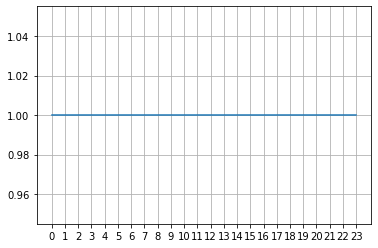

In [147]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.Sales)
plt.xticks(keys)
plt.grid()
plt.show()

In [115]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,address,city,code,Time
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,136 Church St,New York City,NY 10001,00:01:00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,562 2nd St,New York City,NY 10001,07:03:00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,277 Main St,New York City,NY 10001,18:21:00
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,410 6th St,San Francisco,CA 94016,15:13:00
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,43 Hill St,Atlanta,GA 30301,12:38:00
